### Library

In [1]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd


### Data Importing

In [2]:
df=pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


### processing

In [3]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

Text(0.5, 1.0, 'Correlation')

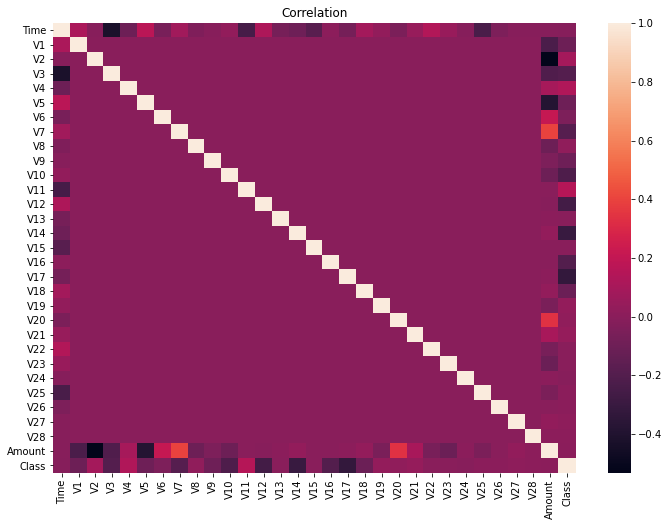

In [4]:
%matplotlib inline
import seaborn as sns
a4_dims = (11.7, 8.27)

fig, ax = plt.subplots(figsize=a4_dims)
sns.heatmap(df.corr())
ax.set_title('Correlation')

In [5]:
New_column=[ f'V{i}'for i in range(1,29)]
y_column="Class"
x_df=df[New_column]
y_df=df[y_column]

In [6]:
data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAp0AAAIOCAYAAAD6J7bTAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjMuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8vihELAAAACXBIWXMAAAsTAAALEwEAmpwYAABRzklEQVR4nO3de5xddX3v/9ebS2IQEUWqRtSoYL0CDSm1tV5zLPHSqq2FWG9YPdG2VqG/eqyth/Zw6KnWVqy21hMVRbEhJZJIFUGPmgIVjEkMKFrlUi9pUCqFSrwgMJ/fH3uNbMdJMpO9194rM69nHusxe3/XWp/92ZOdyWe+37W+31QVkiRJUpv2G3cCkiRJmvssOiVJktQ6i05JkiS1zqJTkiRJrbPolCRJUussOiVJktQ6i05Jc16Sk5NcNsD5H0vykmHmJEnzjUWnpJFJ8ltJNifZmeSGppj75XHn1S/JnyU5p7+tqp5eVWePKydJmgssOiWNRJI/AN4K/B/gvsCDgHcAz55lnANm0iZJ6haLTkmtS3JP4HTg96rq/Kr6XlXdXlX/VFWvTbIwyVuT7Gi2tyZZ2Jz75CTbk7wuybeA9za9keuSnJPku8DJSe6Z5D1ND+q/Jzkjyf67yOdvknwzyXeTbEnyhKZ9BfDHwElNb+yVTfvGJC9vHu+X5A1Jvp7kxiTvb94fSZYkqSQvSfKNJN9J8idtf38laV9g0SlpFH4RuBuwfhf7/wR4HHAscAxwPPCGvv33A+4NPBhY1bQ9G1gHHAp8EDgbuAM4Evg54FeAl+/i9T7XvNa9gX8Azktyt6q6iF5P7NqqOriqjpnm3JOb7SnAQ4GDgb+dcswvAz8LLAdOS/LIXeQhSfOGRaekUTgM+E5V3bGL/S8ATq+qG6vqP4D/Bbyob/8E8KdVdVtV/aBpu7yqNlTVBHAI8HTglKYX9UbgTGDldC9WVedU1U1VdUdV/TWwkF6ROBMvAN5SVddX1U7g9cDKKUP8/6uqflBVVwJX0iukJWle8zooSaNwE3CfJAfsovBcDHy97/nXm7ZJ/1FVP5xyzjf7Hj8YOBC4Iclk235TjvmxJP8fvV7QxUDRK1rvM7O3Mm2uB9C7TnXSt/oef59eb6gkzWv2dEoahcuBHwLP2cX+HfQKx0kPatom1TTn9Ld9E7gNuE9VHdpsh1TVo6ee1Fy/+TrgROBeVXUo8F/AZLU63WvtKdc7gG/v4TxJmtcsOiW1rqr+CzgN+Lskz0lyUJIDkzw9yV8Ca4A3JDk8yX2aY8/ZXcwp8W8APg78dZJDmpt9HpbkSdMcfg96ReJ/AAckOY1eT+ekbwNLkuzq5+Ma4NQkD0lyMHddA7qrSwckSVh0ShqRqnoL8Af0bhD6D3q9k68CNgBnAJuBq4AvAFubttl4MbAA+BJwM72bjO4/zXEXAx8DvkpvaPyH/OQw/HnN15uSbJ3m/LOADwCXAP/WnP/7s8xVkuadVO1pJEmSJEkajD2dkiRJap1FpyRJ0jyS5KxmcYsv7mJ/krwtybVJrkqydBiva9EpSZI0v7wPWLGb/U8Hjmq2VcDfD+NFLTolSZLmkaq6BPjP3RzybOD91XMFcGiS6W7MnBWLTkmSJPV7AD85q8f2pm0gc3JFotu/c/3At+R/+LH/c+A8rl2QPR+0G39767aBc/j1Q35qbuxZ+9Uf7PmYPfnUov0HjvHI2wf/Hen6Awb7aNyNwf5OAe4+MXAIPsJNA8d4xe33GjjGZ+82+OwXP9zjXOx7duNPLVY0O8tq8AWDvr3fnQPHOPpHg/87uXnwEHx7/8E/pEfcOdi/1wfcPvj3c8cBg38z/nMI389La3cdSjOzbL/B/70eVIP//OqCYc258/qvnzPWb8gwapVdWXD4w15Bb1h80uqqWj2LENN9bwbOd04WnZIkSfNVU2DOpsicajvwwL7nR/CTq8TtFYtOSZKkUZsYvDe/RRcAr0pyLvALwH81K78NpLWiM8lhwCebp/cD7qS3CsmR9C5O/d22XluSJEnTS7IGeDJwnyTbgT8FDgSoqncCFwLPAK4Fvg+8dBiv21rRWVU3AccCJPkzYGdV/VVbrydJkrTPqCFc4L+3L131/D3sL+D3hv26I797PcmTk3ykefxnSc5O8vEkX0vy60n+MskXklyU5MDmuOOS/HOSLUkuHsZt+5IkSRqdLkyZ9DDgmfTmhDoH+HRVPRb4AfDMpvB8O/C8qjoOOAv483ElK0mSNLCJifa2jupC0fmxqrod+AKwP3BR0/4FYAnws8BjgE8k2Qa8gd5dVD8hyaokm5Nsfvf714wib0mSJM1QF+5evw2gqiaS3N5cRwAwQS+/AFdX1S/uLkj/9ABtzn0lSZI0qBrjNZ3j0oWezj35CnB4kl8ESHJgksFnPJckSRoXh9e7p6p+BDwPeFOSK4FtwC+NNSlJkiTNykiG16vqz/oebwQ2Tm1vnh+8i3O2AU9sM0dJkqSRcXhdkiRJGr4u3EgkSZI0v3R7GcxW5K6bxeeOdfd/wcBv6tlf+N8D53HmcacNHEOSpLnikrp54BgP3e/gPR80A2/72toMJdBe+tHXt7ZWgC148NKxvrddsadTkiRp1ObhNZ0WnZIkSaPW4amN2uKNRJIkSWpdJ4rOJBuTnDCl7ZQk70hyUZJbknxkXPlJkiQNU9VEa1tXdaLoBNYAK6e0rWza3wy8aOQZSZIkaWi6ck3nOuCMJAur6rYkS4DFwGVVVUmePM7kJEmShsprOsejqm4CNgErmqaVwNqai/M5SZIkzUOdKDob/UPsk0PrM5ZkVZLNSTZ/4vvXDj05SZKkoamJ9raO6lLRuQFYnmQpsKiqts7m5KpaXVXLqmrZ0w46spUEJUmShmLizva2jupM0VlVO4GNwFnMspdTkiRJ3daVG4kmrQHOp+9O9iSXAo8ADk6yHXhZVV08pvwkSZIG1+Fh8LZ0quisqvVAprQ9YUzpSJIkaUg6VXRKkiTNC06ZJEmSJA3fnOzpvHZB9nzQHpx53GkDxzh1y+ljz0GSpK646FvbBo5x9n2eMngiXeA1nZIkSWqdw+uSJEnS8HWi6EyyMckJU9pOSXJhksuTXJ3kqiQnjStHSZKkYam6s7Wtq7oyvD65BGb//JsrgdcBO6rqmiSLgS1JLq6qW8aQoyRJkvZSV4rOdcAZSRZW1W1JlgCLgUuqqgCqakeSG4HDgVvGlqkkSdKg5uGNRJ0YXq+qm4BNwIqmaSWwdrLgBEhyPLAAuG70GUqSJGkQnSg6G5ND7DRff7z+epL7Ax8AXlo1/a8GSVYl2Zxk86ad17SerCRJ0l6bmGhv66guFZ0bgOVJlgKLqmorQJJDgI8Cb6iqK3Z1clWtrqplVbXs+IOPGknCkiRJe6Um2ts6qjNFZ1XtBDYCZ9H0ciZZAKwH3l9V540vO0mSJA2iKzcSTVoDnM9dw+wnAk8EDktyctN2clVtG31qkiRJQzLR3amN2tKporOq1gPpe34OcM74MpIkSdIwdKrolCRJmhc6fO1lWzpzTackSZLmrvRNhTlnHHHvxwz8pl59j2OHkMlgTt1y+sAxzjzutCFkIknS4C6v/xo4xgEZTn/ZeV//cPZ8VHt+eMXa1gqwuz3upLG+t12xp1OSJEmt85pOSZKkUZuH13RadEqSJI1ah1cOaksnhteTbExywpS2U5K8N8mWJNuSXJ3klePKUZIkSXuvKz2dk+uuX9zXthJ4HXBFVd2W5GDgi0kuqKod40hSkiRpKOzpHJt1wLOSLARIsgRYDFxSVbc1xyykO/lKkiRpFjpRxFXVTcAmYEXTtBJYW1WV5IFJrgK+CbzJXk5JkrSvq7qzta2rOlF0NiaH2Gm+rgGoqm9W1dHAkcBLktx3upOTrEqyOcnm7932nyNJWJIkSTPTpaJzA7A8yVJgUVVt7d/Z9HBeDTxhupOranVVLauqZXdfeO/Wk5UkSdprExPtbR3VmaKzqnYCG4GzaHo5kxyRZFHz+F7A44GvjCtHSZKkoaiJ9raO6srd65PWAOdz1zD7I4G/TlJAgL+qqi+MKzlJkiTtnU4VnVW1nl5xOfn8E8DR48tIkiSpBWMcBk+yAvgbYH/g3VX1xin77wmcAzyIXq34V1X13kFftzPD65IkSWpXkv2BvwOeDjwKeH6SR0057PeAL1XVMcCT6Y06Lxj0tTvV0ylJkjQvjO/ay+OBa6vqeoAk5wLPBr7Ud0wB90gS4GDgP4E7Bn3hOVl0/vohjx48SA0eYlBnHnfawDFO3XJ6J/KQJOnEOw4ZOMZBEx34D3rf9gB6c59P2g78wpRj/ha4ANgB3AM4qWrwKtnhdUmSpFFrccqk/rnLm21V3ytnmmymVvInANvorQ55LPC3SQb+jWFO9nRKkiR1WovD61W1Gli9i93bgQf2PT+CXo9mv5cCb6yqAq5N8m/AI+itHrnXOtHTmWRjkhOmtJ2S5B3N40OS/HuSvx1PhpIkSXPC54CjkjykuTloJb2h9H7fAJYDNCtB/ixw/aAv3JWezsklMC/ua1sJvLZ5/L+Bfx51UpIkSa0Y05RJVXVHklfRq7n2B86qqquTvLLZ/056ddf7knyB3nD866rqO4O+dleKznXAGUkWVtVtSZbQu47gsiTHAfcFLgKWjTFHSZKkfV5VXQhcOKXtnX2PdwC/MuzX7cTwelXdRO86gRVN00pgLb3q+q+5q8dTkiRp3+fa62M1OcRO83UN8LvAhVX1zV2e1ei/U+uLt17XYpqSJEmarS4VnRuA5UmWAouqaivwi8CrknwN+CvgxUneON3JVbW6qpZV1bLH3ONho8pZkiRp9mqiva2junJNJ1W1M8lG4Cx6vZxU1Qsm9yc5GVhWVX80lgQlSZKGpcPD4G3pUk8n9IrNY4Bzx52IJEmShqczPZ0AVbWe6WfKp6reB7xvlPlIkiS1osPD4G3pWk+nJEmS5qBO9XRKkiTNC/Pwms45WXT+6g8Gj/H5uw0eowvOPO60gWOcuuX0TuQhSdq3nXb7vw4c4xl3P2oImcCzhxJFszEni05JkqROm4fXdFp0SpIkjdo8HF73RiJJkiS1rhNFZ5KNSU6Y0nZKknckuTPJtma7YFw5SpIkDY1rr49N/7rrkybXX/9BVR3bbL82+tQkSZI0qK4UneuAZyVZCJBkCbAYuGycSUmSJLWiqr2tozpRdFbVTcAmYEXTtBJYW1UF3C3J5iRXJHnOuHKUJEnS3utE0dnoH2KfHFoHeFBVLQN+C3hrkodNd3KSVU1xuvmjP7iu/WwlSZL2ltd0jtUGYHmSpcCiqtoKUFU7mq/XAxuBn5vu5KpaXVXLqmrZMxdNW5dKkiR1g0Xn+FTVTnpF5Vk0vZxJ7tV3ned9gMcDXxpXjpIkSdo7XZscfg1wPncNsz8S+L9JJugVyG+sKotOSZK0b3NFovGqqvVA+p5/Bnjs+DKSJEnSMHSq6JQkSZoXOnztZVs6c02nJEmS5q452dP5qUX7DxzjXt2dW3XkzjzutIFjnLrl9E7kIUkan7MPWDJwjIsY/P/4TujwJO5tmZNFpyRJUqc5vC5JkiQNXyeKziQbk5wwpe2UJO9I8qAkH0/y5SRfatZllyRJ2nc5OfzY9C+BOWlyKcz3A2+uqkcCxwM3jjg3SZIkDagr13SuA85IsrCqbmt6MxcD/wkcUFWfgB+vWiRJkrRvm4eTw3eip7OqbgI2ASuappXAWuAo4JYk5yf5fJI3J5kjt61JkiTNH50oOhv9Q+yTQ+sHAE8A/hD4eeChwMnTnZxkVZLNSTZvu/Xa9rOVJEnaSzVRrW1d1aWicwOwPMlSYFFVbQW2A5+vquur6o7mmKXTnVxVq6tqWVUtO/YeR44qZ0mSpNnzRqLxaa7X3AicRa+XE+BzwL2SHN48fyrwpdFnJ0mSpEF05UaiSWuA82mG2avqziR/CHwySYAtwLvGmJ8kSdLg5uGNRJ0qOqtqPZApbZ8Ajh5PRpIkSRqGThWdkiRJ80KHb/hpS2eu6ZQkSdLcNSd7Oh95++C19Lfm5HdmfM487rSBY5y65fRO5CFJ2jtHPuo7A8f4yrX3GkImHdDhu8zbYmklSZI0avOw6HR4XZIkSa2zp1OSJGnUyhuJxiLJxiQnTGk7JcmXk2zr236Y5DljSlOSJEl7qSs9nZPrrl/c17YSWFVVlwIkuTdwLfDx0acnSZI0RF7TOTbrgGclWQiQZAmwGLis75jnAR+rqu+PPj1JkiQNohNFZ1XdBGwCVjRNK4G1VT9xwcNK7lqTXZIkad81Ue1tHdWJorMxOcQOUwrMJPcHHstPDr//hCSrkmxOsvnT37um1UQlSZIGUhPtbR3VpaJzA7A8yVJgUVVt7dt3IrC+qm7f1clVtbqqllXVsqfc/aiWU5UkSdJsdOVGIqpqZ5KNwFn89DD684HXjzwpSZKkNnR4GLwtXerphF6xeQxw7mRDc1PRA4F/HlNOkiRJGlBnejoBqmo9kCltXwMeMJaEJEmSWlBOmSRJkqS5LMmKJF9Jcm2SP9rFMU9uFua5OslQRps71dMpSZI0L4zpms4k+wN/BzwN2A58LskFVfWlvmMOBd4BrKiqbyT5mWG89pwsOq8/YPC/yIN+cpRfHXDmcacNHOPULaePPQdJmq/OuO5+A8f4pTpwCJnMa8cD11bV9QBJzgWeDXyp75jfAs6vqm8AVNWNw3hhh9clSZJGbXzzdD4A+Gbf8+389L0zDwfulWRjki1JXjyMtzwnezolSZI6rcXh9SSrgFV9TauravXk7mlOmZrMAcBxwHJgEXB5kiuq6quD5NWJorOZn/MvqurivrZT6FXaO4Fn0uuV/QTwminLY0qSJKnRFJird7F7O72pKCcdAeyY5pjvVNX3gO8luYTelJYDFZ1dGV7vXwJz0kpgLfB44GjgMcDPA08abWqSJElDNjHR3rZ7nwOOSvKQJAvo1VsXTDnmw8ATkhyQ5CDgF4AvD/qWO9HTCawDzkiysKpuayaEXwz8CLgbsIBed/CBwLfHlqUkSdI+rKruSPIq4GJgf+Csqro6ySub/e+sqi8nuQi4CpgA3l1VXxz0tTtRdFbVTUk2ASvoVdcrgbVVdXmSTwM30Cs6/7aqBq60JUmSxmqMy2BW1YXAhVPa3jnl+ZuBNw/zdbsyvA4/OcS+EliT5EjgkfSuN3gA8NQkT5zu5CSrkmxOsnnLzmtHkrAkSZJmpktF5wZgeZKlwKKq2go8F7iiqnZW1U7gY8Djpju5qlZX1bKqWnbcwUeOLGlJkqRZG9+USWPTmaKzKSo3AmfR6/UE+AbwpOZC1gPp3UTk8LokSdq3TVR7W0d1puhsrKF3S/65zfN1wHXAF4ArgSur6p/GlJskSZL2UiduJJpUVevpm7S0qu4EXjG+jCRJkoav9jy10ZzTtZ5OSZIkzUGd6umUJEmaFzp87WVb5mTRebdplxWV4MzjThvo/FO3nD72HCRpX3XoEMqO6/e7YwiZaBzmZNEpSZLUafZ0SpIkqXUdnk+zLd5IJEmSpNZ1oqczyUbgL6rq4r62U4CHA7cCz2ya/3dVrR15gpIkScM0D4fXu9LT2b/u+qSVwLeBpcCxwC8Ar01yyGhTkyRJ0qC6UnSuA56VZCFAkiXAYuD7wD9X1R1V9T16qxKtGFuWkiRJQ1AT1drWVZ0oOqvqJmATdxWUK4G19IrMpyc5KMl9gKcADxxPlpIkSdpbnSg6G/1D7CuBNVX1ceBC4DPN/suBaSfoSrIqyeYkmzftvGYU+UqSJO2diWpv66guFZ0bgOVJlgKLqmorQFX9eVUdW1VPo7cu+7QVZVWtrqplVbXs+IOPGlnSkiRJszYx0d7WUZ0pOqtqJ7AROIteryZJ9k9yWPP4aOBo4OPjylGSJEl7pxNTJvVZA5zPXcPsBwKXJgH4LvDCqnL9K0mStG/r8DB4WzpVdFbVerhr4fSq+iHwqPFlJEmSpGHoVNEpSZI0L8zDns7OXNMpSZKkuWtO9nTefQg3bv3AclzTOPO40waOceqW0zuRhySN2i3Tz3o4K1+f+N4QMhm/qvnX0zkni05JkqROc3hdkiRJGr6RFp1JNiY5YUrbKUnekeSiJLck+ciU/Q9J8tkk1yRZm2TBKHOWJEkaOlckal3/UpeTVjbtbwZeNM05bwLOrKqjgJuBl7WaoSRJkoZu1EXnOuBZSRYCJFkCLAYuq6pPArf2H5zerPBPbc4DOBt4zqiSlSRJakNNVGtbV4206Kyqm4BNwIqmaSWwtnZ9C9dhwC19qxBtBx7QbpaSJEkatnHcSNQ/xD45tL4rmaZt2gI1yaokm5Ns/ped1wyYoiRJUou8pnMkNgDLkywFFlXV1t0c+x3g0CSTUzsdAeyY7sCqWl1Vy6pq2eMPPmqoCUuSJA3VRItbR4286KyqncBG4Cx238tJM+z+aeB5TdNLgA+3mZ8kSZKGb1zzdK4BjgHOnWxIcilwHr1e0O19Uyu9DviDJNfSu8bzPaNOVpIkaZjm441EY1mRqKrWM+V6zap6wi6OvR44fhR5SZIkqR0ugylJkjRqHe6RbIvLYEqSJKl1c7Kn8yPcNHCM5Rw2hEykn3bmcacNHOPULad3Ig9Jmo0j6sCBY6y47eAhZNIBHb7LvC1zsuiUJEnqsi7f8NMWh9clSZLUOns6JUmSRm0eDq+PtKczyca++Tcn205J8o4kFyW5JclHpux/VZJrk1SS+4wyX0mSJA3HqHs6J9ddv7ivbSXwWmABcBDwiinn/AvwEXqrGEmSJO3zvKazfeuAZyVZCJBkCbAYuKyqPgncOvWEqvp8VX1tlElKkiRpuEZadFbVTcAmYEXTtBJY26yxLkmSND9MtLh11DjuXp8cYqf5umYYQZOsSrI5yebtO785jJCSJEmtqIn2tq4aR9G5AVieZCmwqKq2DiNoVa2uqmVVteyIgx84jJCSJEkakpFPmVRVO5NsBM5iSL2ckiRJ+5QO90i2ZVyTw68BjgHOnWxIcilwHr1e0O2TUysleXWS7cARwFVJ3j2OhCVJkrT3xjI5fFWtBzKl7Qm7OPZtwNtGkZckSdIodPnay7a4DKYkSdI8kmRFkq80i+/80W6O+/kkdyZ53jBe12UwJUmSRm1MPZ1J9gf+DngasB34XJILqupL0xz3Jn5yQZ+BzMmi8xW332vgGNcuHEIiUkvOPO60gWOcuuX0TuQhaf4YRp31lgU3DyEKPGMoUfbeGIfXjweurarrAZKcCzwb+NKU434f+BDw88N6YYfXJUmS5o8HAP0Tmm9v2n4syQOA5wLvHOYLz8meTkmSpC5rs6czySpgVV/T6qpaPbl7unSmPH8r8LqqujOZ7vC9M9Kis5mf8y+q6uK+tlOAhwMPBR5Hbx32Z/Xt/yCwDLid3hKar6iq20eYtiRJ0j6jKTBX72L3dqB/FZ0jgB1TjlkGnNsUnPcBnpHkjqraMEheox5e718Cc9LkUphvBl40zTkfBB4BPBZYBLy8zQQlSZLaNsZlMD8HHJXkIUkW0KvDLviJ3KoeUlVLqmoJsA743UELThh90bkOeFaShQBJlgCL6fVufhK4deoJVXVhNej1dB4xwnwlSZLmjKq6A3gVvbvSvwz8Y1VdneSVSV7Z5muPdHi9qm5KsglYAXyYXnW9tikodyvJgfR6Ql/TbpaSJEktq+FdKznrl666ELhwStu0Nw1V1cnDet1x3L3eP8Q+ObQ+E+8ALqmqS6fbmWRVks1JNn/8+9cOIU1JkqR2jHF4fWzGUXRuoLe++lJgUVVt3dMJSf4UOBz4g10dU1Wrq2pZVS37lYOOHFqykiRJGtzIp0yqqp3NXexnMYNeziQvB04Alld1uX6XJEmamZoY3/D6uIxrcvg1wDHAuZMNSS4FzqPXC7o9yQnNrncC9wUuT7ItiUugSJIk7WPGMjl8Va1nyuSkVfWEXRzrBPaSJGlOmY9jty6DKUmSpNbZiyhJkjRiNcYpk8ZlThadn73bHqf93KPDBg8hddqZxw1+efSpW07vRB6S9g0HDOH/1l/Z7/DBg2gs5mTRKUmS1GXz8ZpOi05JkqQRc8okSZIkqQUjLTqTbOybf3Oy7ZQk70hyUZJbknxkyv73JLkyyVVJ1iU5eJQ5S5IkDVtVe1tXjbqns3/d9UmT66+/GXjRNOecWlXHVNXRwDeAV7WboiRJkoZt1Nd0rgPOSLKwqm5LsgRYDFxWVZXkyVNPqKrvAiQJsAjocA0vSZK0Z17T2bKqugnYBKxomlYCa6t23xmc5L3At4BHAG9vNUlJkiQN3ThuJOofYp8cWt+tqnopvR7RLwMnTXdMklVJNifZvO3Wa4eVqyRJ0tDVRFrbumocRecGYHmSpcCiqto6k5Oq6k5gLfAbu9i/uqqWVdWyY+9x5NCSlSRJGjZvJBqBqtoJbATOYg+9nOk5cvIx8KvAv7adoyRJkoZrXJPDrwHOp+9O9iSX0rtm8+Ak24GXAZ8Azk5yCBDgSuB3Rp+uJEnS8HR5GLwtYyk6q2o9vSKyv+0Juzj88e1nJEmSpDa5DKYkSdKIVc2/nk6XwZQkSVLr5mRP5w+dP14aiTOPO23gGKduOb0TeUhq392G8N/zB+/898GDAP9jKFH2Xk2MOYExmJNFpyRJUpdNOLwuSZIkDd9Ii84kG5OcMKXtlCTvSHJRkluSfGQX5749yc7RZCpJktSeqrS2ddWoezr7l8CcNLkU5puBF013UpJlwKGtZiZJkqTWjLroXAc8K8lCgCRL6K2pfllVfRK4deoJSfanV5CO+5pfSZKkoXDt9ZZV1U3AJmBF07QSWFu125VCXwVcUFU3tJ2fJEmS2jGOG4n6h9gnh9anlWQx8JvA2/cUNMmqJJuTbP7irdcNJVFJkqQ2VLW3ddU4is4NwPIkS4FFVbV1N8f+HHAkcG2SrwEHJbl2ugOranVVLauqZY+5x8OGnbMkSdLQzMfh9ZHP01lVO5NsBM5iN72czbEfBe43+TzJzqo6st0MJUmSNGzjmhx+DXA+fXeyJ7kUeARwcJLtwMuq6uIx5SdJktSa+Tg5/FiKzqpaD2RK2xNmcN7BrSUlSZKk1rgMpiRJ0oh1eRL3trgMpiRJklo3J3s6b6wfDhzjATiSL43CmcedNnCMU7ecPvYcJO3Z94fQ1fXc/R4weJAO6PLURm2Zk0WnJElSl83HG4kcXpckSVLr7OmUJEkaMW8kalmSjUlOmNJ2SpJ3JLkoyS1JPjJl//uS/FuSbc127ChzliRJ0uBG3dM5ue56/6TvK4HXAguAg4BXTHPea6tqXfvpSZIktW8+3kg06ms61wHPSrIQIMkSYDFwWVV9Erh1xPlIkiRpBEZadFbVTcAmYEXTtBJYW7XHev/Pk1yV5MzJglWSJGlfNVFpbeuqcdy9PjnETvN1zR6Ofz29Ndl/Hrg38LrpDkqyKsnmJJuv3fm1IaUqSZI0fFVpbeuqcRSdG4DlSZYCi6pq6+4Orqobquc24L3A8bs4bnVVLauqZUcevGTYOUuSJGkAI58yqap2JtkInMWeezlJcv+quiFJgOcAX2w3Q0mSpHZ1eRi8LeOap3MNcD53DbOT5FJ6w+gHJ9kOvKyqLgY+mORwIMA24JWjT1eSJEmDGEvRWVXr6RWR/W1P2MWxTx1JUpIkSSMyD2dMchlMSZIktc+iU5IkacTGOWVSkhVJvpLk2iR/NM3+FzRTVV6V5DNJjhnGe56Ta68vq4MHjnHn/Lu+V9pnnXncaQOdf+qW08eeg6SZ2cR3x53CUIxraqMk+wN/BzwN2A58LskFVfWlvsP+DXhSVd2c5OnAauAXBn1tezolSZLmj+OBa6vq+qr6EXAu8Oz+A6rqM1V1c/P0CuCIYbzwnOzplCRJ6rKJ8b30A4Bv9j3fzu57MV8GfGwYLzzSns4kG5OcMKXtlCTvSHJRkluSfGTK/iT58yRfTfLlJK8eZc6SJEn7kv5VGpttVf/uaU6Z9mb6JE+hV3ROuxrkbI26p3NyCcyL+9pWAq8FFgAHAa+Ycs7JwAOBR1TVRJKfGUGekiRJralpa78hxa5aTe86zOlsp1dXTToC2DH1oCRHA+8Gnl5VNw0jr1Ff07kOeFaShQBJlgCLgcuq6pPArdOc8zvA6VU1AVBVN44oV0mSpLnmc8BRSR6SZAG9zr8L+g9I8iB6i/i8qKq+OqwXHmnR2VTKm4AVTdNKYG1V7W6O1IcBJzXdwx9LclTbeUqSJLVpotrbdqeq7gBeRW/U+cvAP1bV1UlemWRy1cfTgMOAdyTZlmTzMN7zOG4kmhxi/3Dz9bf3cPxC4IdVtSzJr9Nbs/2nVi9qrldYBfC8ex3P4w62NpUkSd000eLw+p5U1YXAhVPa3tn3+OXAy4f9uuOYMmkDsDzJUmBRVW3dw/HbgQ81j9cDR093UFWtrqplVbXMglOSJKlbRl50VtVOYCO9Hss1MzhlAzC5/vqTgKFdWyBJkjQORVrbumpck8OvAY6hNyEpAEkuBc6j1wu6vW9qpTcCv5HkC8Bf0EJ3ryRJkto1lsnhq2o9U+aJqqqfuk6zab8FeOYI0pIkSRqJMU4OPzYugylJkqTWuQymJEnSiHX52su2zMmi89v73TlwjPvU/kPIRNK+4MzjThs4xqlbTu9EHlKX7b+HOSRn4mu33zx4kA5weF2SJElqwZzs6ZQkSeoyezolSZKkFoy06EyysW/+zcm2U5K8I8lFSW5J8pEp+y9t1v3clmRHkg2jzFmSJGnY5uPk8KMeXp9cd/3ivraVwGuBBcBBwCv6T+ifvzPJh+it2S5JkqR9yKiLznXAGUkWVtVtSZYAi4HLqqqSPHlXJya5B73lMF86ikQlSZLaMtHdDsnWjHR4vapuAjYBK5qmlcDaqprJJArPBT5ZVd9tKz9JkqRRmCCtbV01jhuJJofYab6umeF5z9/dsUlWJdmcZPOVt147YIqSJEkapnEUnRuA5UmWAouqauueTkhyGHA88NFdHVNVq6tqWVUtO+YeRw4tWUmSpGGrFreuGnnRWVU7gY3AWcy8l/M3gY9U1Q/bykuSJEntGdc8nWuAY4BzJxuSXAqcR68XdPuUqZVmMwwvSZLUaRMtbl01lhWJqmo9/OSVrv1TI01z/JPbzkmSJEntcRlMSZKkEZtId+8yb4vLYEqSJKl1c7Kn8+gf7T9wjB0HDiERSfPGmcedNnCMU7ec3ok8pLYsHMKt1Y9buHjwIB3Q5bvM2zIni05JkqQu6/INP21xeF2SJEmtG2nRmWTjlKmQSHJKknckuSjJLUk+MmX/8iRbk2xLclkSZ36XJEn7tIm0t3XVqHs6+5fAnDQ5B+ebgRdNc87fAy+oqmOBfwDe0GaCkiRJGr5RX9O5DjgjycKqui3JEmAxcFlVVZInT3NOAYc0j+8J7BhFopIkSW2ZoMNdki0ZadFZVTcl2QSsAD5Mr5dzbVXt7iaulwMXJvkB8F3gce1nKkmSpGEax41E/UPsM1ne8lTgGVV1BPBe4C3THZRkVZLNSTZ/6vvXDC1ZSZKkYasWt64aR9G5gd766kuBRVW1dVcHJjkcOKaqPts0rQV+abpjq2p1VS2rqmVPPeioYecsSZI0NN5INAJVtRPYCJzFnns5bwbumeThzfOnAV9uLztJkiS1YVyTw68BzqfvTvYklwKPAA5Osh14WVVdnOS/Ax9KMkGvCP3tcSQsSZI0LPNxcvixFJ1VtR5+8ratqnrCbo5dP4q8JEmS1A6XwZQkSRqxLt/w0xaXwZQkSVLr5mRP5837jzsDSZq9M487beAYp245vRN5SNO5Yf/Br2R8xJ0HDiGT8evyXeZtmZNFpyRJUpfNxxuJHF6XJElS6+zplCRJGjF7OluWZGOSE6a0nZLkHUkuSnJLko9M2f/UJFuTfDHJ2UkslCVJkvYxox5e7193fdLk+utvBl7UvyPJfsDZwMqqegzwdeAlI8hTkiSpNZX2tq4addG5DnhWkoUASZYAi4HLquqTwK1Tjj8MuK2qvto8/wTwGyPKVZIkSUMy0qKzqm4CNgErmqaVwNqq2tUcqd8BDkyyrHn+POCB7WYpSZLUrokWt64ax93r/UPsk0Pr02qK0ZXAmUk20esJvWO6Y5OsSrI5yeZ/2XnNkFOWJEkaHovO0dgALE+yFFhUVVt3d3BVXV5VT6iq44FLgGkryqpaXVXLqmrZ4w8+auhJS5Ikae+NvOisqp3ARuAsdtPLOSnJzzRfFwKvA97ZZn6SJEltqxa3rhrX5PBrgGOAcycbklwKnEevF3R739RKr03yZeAq4J+q6lMjz1aSJEkDGcucl1W1HsiUtifs4tjXAq8dRV6SJEmjMB/XXncZTEmSJLXO1X0kSZJGrMt3mbdlThad395/8L/KQ8pOYEn7njOPO23gGKduOb0TeWjuWXXvGweOseE79xtCJuM3zqIzyQrgb4D9gXdX1Run7E+z/xnA94GT9zTb0ExYWUmSJM0TSfYH/g54OvAo4PlJHjXlsKcDRzXbKuDvh/HaFp2SJEkjNsYpk44Hrq2q66vqR/RmEnr2lGOeDby/eq4ADk1y/71/tz0jLTqTbOybCmmy7ZQkFya5PMnVSa5KclLf/ock+WySa5KsTbJglDlLkiTNIQ8Avtn3fHvTNttjZm3UPZ39S2BOWgm8CXhxVT2a3rrsb01yaLP/TcCZVXUUcDPwshHlKkmS1IqJtLf1Lw3ebKv6Xnq6yZqmdpDO5JhZG3XRuQ54VrO6EEmWAIuBS6rqGoCq2gHcCBzeXMj61OY8gLOB54w4Z0mSpH1G/9Lgzba6b/d24IF9z48AdkwJMZNjZm2kRWdV3QRsotebCb1ezrVV9ePqOcnxwALgOuAw4JaquqPZPZTuXUmSpHGaaHHbg88BRzWXLy6gV4tdMOWYC4AXp+dxwH9V1Q17/257xnEjUf8Q+0r61l9vLlL9APDSqppgFt27/V3JW2+9dsgpS5IkDc+4biRqOvJeBVwMfBn4x6q6Oskrk7yyOexC4HrgWuBdwO8O/o7HM0/nBuAtSZYCiybnfUpyCPBR4A3NnVIA36F3x9QBzTdpl927TdfxaoA3LPmtLq93L0mSNDZVdSG9wrK/7Z19jwv4vWG/7sh7OqtqJ7AROIuml7Pp3l1P7/b88/qOLeDTwPOappcAHx5lvpIkScM2QbW2ddW45ulcAxxDb24ogBOBJwInJ9nWbMc2+14H/EGSa+ld4/meUScrSZKkwYxlGcyqWk/f9ZpVdQ5wzi6OvZ7eRKaSJElzwnxce90ViSRJktS6sfR0SpIkzWfdvfKyPXOy6DzizsE7cL9rH7CkeerM404bOMapW04few7qnituuO/AMQ6cI5WLw+uSJElSC+bI7wuSJEn7jonplr+Z4+zplCRJUutGWnQm2ZjkhCltpyS5MMnlSa5OclWSk/r2vyrJtUkqyX1Gma8kSVIbnBy+ff3rrk9aCbwJeHFVPRpYAbw1yaHN/n8B/hvw9VElKUmSpOEa9TWd64AzkiysqtuSLAEWA5c0S15SVTuS3AgcDtxSVZ8HSObhxQ+SJGlO6m5/ZHtG2tNZVTcBm+j1ZkKvl3PtZMEJkOR4YAFw3ShzkyRJGpWJFreuGseNRP1D7Cub5wAkuT/wAeClVTWr71uSVUk2J9l86c5rhpasJEmSBjeOonMDsDzJUmBRVW0FSHII8FHgDVV1xWyDVtXqqlpWVcuecPBRQ01YkiRpmLyRaASqaiewETiLppczyQJgPfD+qjpv1DlJkiSpXeOap3MNcAxwbvP8ROCJwMlJtjXbsQBJXp1kO3AEcFWSd48jYUmSpGGpFreuGsuKRFW1Hkjf83OAc3Zx7NuAt40oNUmSJLXAZTAlSZJGrMt3mbfFolOSJGnEunzDT1vmZNH5gNvvHDjGdxfuP4RMJGl+OvO40wY6/9Qtp489Bw3ftoWDF1r3KheL2VfNyaJTkiSpy+ZfP+f47l6XJEnSPDLSojPJxiQnTGk7JcmFSS5PcnWSq5Kc1Lf/g0m+kuSLSc5KcuAoc5YkSRo2l8FsX/8SmJNWAm8CXlxVj6a3Lvtbkxza7P8g8AjgscAi4OWjSVWSJEnDMuprOtcBZyRZWFW3JVkCLAYuqaoCqKodSW4EDgduqaoLJ09OsoneJPGSJEn7rJqHV3WOtKezqm4CNtHrzYReL+fayYITIMnxwALguv5zm2H1FwEXjSZbSZKkdji8Phr9Q+wrm+cAJLk/8AHgpVU19fv2Dno9opdOFzTJqiSbk2y+6PvXtpC2JEmS9tY4is4NwPIkS4FFVbUVIMkhwEeBN1TVFf0nJPlTesPtf7CroFW1uqqWVdWyFQcd2VrykiRJg5qgWtu6auTzdFbVziQbgbNoejmTLADWA++vqvP6j0/ycuAEYPk0vZ+SJEnaB4xrns41wDHAuc3zE4EnAicn2dZsxzb73gncF7i8aXeJCUmStE+rFreuGsuKRFW1Hkjf83OAc3ZxrKsmSZIk7eMs6CRJkkasy9detsVlMCVJktS6OdnTueOA/cedgiRpAGceN/jl+6duOb0Teegut3LnwDHuNUf6y+bjndFzsuiUJEnqMlckkiRJklpgT6ckSdKIzcfh9ZH2dCbZmOSEKW2nJLkwyeVJrk5yVZKT+va/J8mVTfu6JAePMmdJkiQNbtTD6/3rrk9aCbwJeHFVPRpYAbw1yaHN/lOr6piqOhr4BvCqUSUrSZLUhmrxT1eNuuhcBzwryUKAJEuAxcAlVXUNQFXtAG6kt9Y6VfXd5tgAi+j2ZPuSJEmaxkiLzqq6CdhErzcTer2ca6vqx4VkkuOBBcB1fW3vBb4FPAJ4+8gSliRJasFEi1tXjePu9f4h9pXNcwCS3B/4APDSqvrx962qXkqvR/TLwElMI8mqJJuTbL70e9e0lbskSdLAJqpa27pqHEXnBmB5kqXAoqraCpDkEOCjwBuq6oqpJ1XVncBa4DemC1pVq6tqWVUte8Ldj2oteUmSJM3eyIvOqtoJbATOounlTLIAWA+8v6rOmzw2PUdOPgZ+FfjXUecsSZI0TNXi1lXjmqdzDXA+dw2znwg8ETgsyclN28nAVcDZTS9ogCuB3xlpppIkSRrYWIrOqlpPr4icfH4OcM4uDn/8SJKSJEkakYlO90m2w2UwJUmS1DqXwZQkSRqxLk/i3pY5WXT+5/6DxxhCCEnSGJ153GkDxzh1y+mdyGOuWDJx4MAx7siej9kXdHU+zST3pjdb0BLga8CJVXXzlGMeCLwfuB+9t7K6qv5mT7EdXpckSdKkPwI+WVVHAZ9snk91B/D/VdUjgccBv5fkUXsKbNEpSZI0YhNUa9uAng2c3Tw+G3jO1AOq6obJedar6lZ6i/c8YE+BR1p0JtmY5IQpbackuTDJ5UmuTnJVkp9adSjJ25PsHF22kiRJ8859q+oG6BWXwM/s7uAkS4CfAz67p8CjvqZzcgnMi/vaVgKvA3ZU1TVJFgNbklxcVbcAJFkGHDriXCVJklrR5o1ESVYBq/qaVlfV6r79/4/e9ZhT/cksX+dg4EPAKVX13T0dP+qicx1wRpKFVXVbUx0vBi6p6i0WWlU7ktwIHA7ckmR/4M3AbwHPHXG+kiRJ+5SmwFy9m/3/bVf7knw7yf2r6oYk9wdu3MVxB9IrOD9YVefPJK+RDq9X1U3AJmBF07QSWDtZcAIkOR5YAFzXNL0KuGCyq1eSJGlfN9HiNqALgJc0j18CfHjqAc3S5O8BvlxVb5lp4HHcSDQ5xE7zdc3kjqai/gDw0qqaaIbafxN4+56CJlmVZHOSzZt2XtNC2pIkScNRVa1tA3oj8LQk1wBPa56TZHGSC5tjHg+8CHhqkm3N9ow9BR7HPJ0bgLckWQosmrz7qVlf/aPAG6rqiubYnwOOBK7tFdUclOTaqjpyatD+ruS/ePAL59+Mq5IkSQNqRqWXT9O+A3hG8/gy+pYzn6mRF51VtTPJRuAsml7OJAuA9cD7q+q8vmM/St+Frkl2TldwSpIk7Utce3101gDHAOc2z08Engic3NdNe+yYcpMkSdKQjWUZzKpaT1+3bFWdA5wzg/MObjMvSZKkUejqMphtckUiSZIktW4sPZ2SJEnzWZuTw3fVnCw6L63/HDjGk3PvIWQiSdqXnXncaQPHOHXL6Z3Iowtu2W/wQeVDJ+bGIK03EkmSJEktmJM9nZIkSV02hEnc9zn2dEqSJKl1Iy06k2xMcsKUtlOSXJjk8iRXJ7kqyUl9+9+X5N+cv1OSJM0VHV57vTWjHl6fXHf94r62lcDrgB1VdU2z3vqWJBdX1S3NMa+tqnWjTVWSJEnDMuqicx1wRpKFVXVbkiXAYuCSai5uqKodSW4EDgduGXF+kiRJrZuPUyaNdHi9WUR+E7CiaVoJrK2+q2mTHA8sAK7rO/XPm2H3M5MsHFnCkiRJLZigWtu6ahw3Ek0OsdN8XTO5I8n9gQ8AL62qycsSXg88Avh54N70huJ/SpJVSTYn2fyNnd9oK3dJkiTthXEUnRuA5UmWAouqaitAkkOAjwJvqKorJg+uqhuq5zbgvcDx0wWtqtVVtayqlj3o4Ae1/iYkSZL2VlW1tnXVyIvOqtoJbATOounlTLIAWA+8v6rO6z++6f0kSYDnAF8cYbqSJEkagnFNDr8GOJ+7htlPBJ4IHJbk5Kbt5KraBnwwyeFAgG3AK0eaqSRJ0pB1+drLtoyl6Kyq9fSKyMnn5wDn7OLYp44qL0mSJLXDZTAlSZJGbD5OmWTRKUmSNGITHb7hpy1zsuhctt+9Bg8y/z4LkqQWnHncaQPHOHXL6Z3IY1CH1DgmzVFXzMmiU5IkqcvmY9+Wv3JIkiSpdSMtOpNsTHLClLZTklyY5PIkVzfLXZ7Utz9J/jzJV5N8OcmrR5mzJEnSsM3HZTBHPbw+uQTmxX1tK+ktbbmjqq5JshjYkuTiqroFOBl4IPCIqppI8jMjzlmSJEkDGnXRuQ44I8nCqrotyRJgMXBJNes2VdWOJDcChwO3AL8D/NbkWuxVdeOIc5YkSRqqLvdItmWkw+tVdROwCVjRNK0E1lbfQqFJjgcWANc1TQ8DTkqyOcnHkhw1ypwlSZKGzbXXR2NyiJ3m65rJHc066x8AXjrZswksBH5YVcuAd9Fbs/2nJFnVFKabt956bWvJS5IkafbGUXRuAJYnWQosqqqtAEkOAT4KvKGqrug7fjvwoebxeuDo6YJW1eqqWlZVy5be48jWkpckSRrUfLyRaORFZ1XtBDbS67FcA5BkAb2C8v1Vdd6UUzYAk+uvPwn46kgSlSRJ0tCMa3L4NcD53DXMfiLwROCwJCc3bSdX1TbgjcAHk5wK7ARePtpUJUmShsu110ekqtYD6Xt+DnDOLo69BXjmaDKTJElSG1wGU5IkacS6fJd5Wyw6JUmSRqzLN/y0ZU4WnQdV9nyQJEn7iDOPO23gGKduOX3seSya2PMxe3KH/8Xvs+Zk0SlJktRl83F4fRzzdEqSJGmesadTkiRpxObjNZ0j7elMsjHJCVPaTklyYZLLk1yd5KokJ/XtvzTJtmbbkWTDKHOWJEnS4Ebd0zm57vrFfW0rgdcBO6rqmiSLgS1JLq6qW6rqCZMHJvkQ8OGRZixJkjRkTg7fvnXAGUkWVtVtSZYAi4FLqrmitqp2JLkROBy4ZfLEJPegtxzmS0ecsyRJ0lBNeCNRu6rqJmATsKJpWgmsrb5buJIcDywArpty+nOBT1bVd0eRqyRJkoZnHHevTw6x03xdM7kjyf2BDwAvraqps3k9v//YqZKsSrI5yeZNO68ZcsqSJEnDUy3+6apxFJ0bgOVJlgKLqmorQJJDgI8Cb6iqK/pPSHIYcHyzf1pVtbqqllXVsuMPPqq15CVJkjR7I58yqap2JtkInEXTc5lkAbAeeH9VnTfNab8JfKSqfjiyRCVJklriNZ2jswY4Bji3eX4i8ETg5L7pkY7tO/4nhuElSZK0bxnL5PBVtR5I3/NzgHN2c/yTR5CWJEnSSHT52su2uAymJEmSWucymJIkSSM2H6/ptOiUJGkeOPO40waOceqW0wc6/21LB89hrnB4XZIkSfNWknsn+USSa5qv99rNsfsn+XySj8wktkWnJEnSiE1UtbYN6I/orQB5FPDJ5vmuvAb48kwDW3RKkiRp0rOBs5vHZwPPme6gJEcAzwTePdPAIy06k2xMcsKUtlOSXJjk8iRXJ7kqyUl9+5cn2drM3XlZkiNHmbMkSdKwdXgZzPtW1Q0Azdef2cVxbwX+BzB12fJdGvWNRJPrrl/c17YSeB2wo6quSbIY2JLk4qq6Bfh74NlV9eUkvwu8ATh5tGlLkiTtG5KsAlb1Na2uqtV9+/8fcL9pTv2TGcZ/FnBjVW1J8uSZ5jXqonMdcEaShVV1W5IlwGLgkqreRQhVtSPJjcDhwC1AAYc0598T2DHinCVJkoaqasYdhHsRu1YDq3ez/7/tal+Sbye5f1XdkOT+wI3THPZ44NeSPAO4G3BIknOq6oW7y2ukw+tVdROwCVjRNK0E1k4WnABJjgcWANc1TS8HLkyyHXgR8MbpYidZlWRzks2bdl7T1luQJEka2ATV2jagC4CXNI9fAnx46gFV9fqqOqKqltCr5T61p4ITxnMj0eQQO0xZU72pqD8AvLTu+hXgVOAZVXUE8F7gLdMFrarVVbWsqpYdf/BRrSUvSZI0h70ReFqSa4CnNc9JsjjJhYMEHsfk8BuAtyRZCiyqqq0ASQ4BPgq8oaquaNoOB46pqs82564FLhp9ypIkScNTHV2RqBmVXj5N+w7gGdO0bwQ2ziT2yHs6q2onveTOounlTLIAWA+8v6rO6zv8ZuCeSR7ePH8as5gPSpIkSd0wrmUw1wDnc9cw+4nAE4HDkpzctJ1cVduS/HfgQ0km6BWhvz3qZCVJkoZpCNde7nPGUnRW1Xogfc/PAc7ZzbHrR5SaJEmSWjCunk5JkqR5q6vXdLbJonMXLqmbB45x0be2DXT+r95v6cA5nHjHIXs+aA9Ou/1fB45x9gFLBo5x5KO+M3CMM66bbi7cmTt0CP9kbuGOgWMcUQcOHGMYM8QdMISfmXcbQozvd2BB3/2H8D4WDiHGDfsP/je76t7TTcs3O1fccN+Bzt82hG/Grdw5cIwlE4P/W7tlv8H/Tg6pwT/ki4bwj/5tS08b6PxXbz194Bz+ZsAcumIIa6Tvczrwo1qSJElznT2dkiRJIzaENdL3OfZ0SpIkqXUzKjqTPDdJJXlE2wntJodTkhw0rteXJEkalqpqbeuqmfZ0Ph+4jLvm1RyHUwCLTkmSpH3QHovOJAcDjwdeRlN0Jnlykn9O8o9JvprkjUlekGRTki8keVhz3IOTfDLJVc3XBzXt70vyvL7X2NkXd2OSdUn+NckH0/NqYDHw6SSfHvp3QZIkaYQmqNa2rppJT+dzgIuq6qvAfzZrpgMcA7wGeCzwIuDhVXU88G7g95tj/pbe0pZHAx8E3jaD1/s5er2ajwIeCjy+qt4G7ACeUlVPmUEMSZKkznJ4fXrPB85tHp/bPAf4XFXdUFW3AdcBH2/avwAsaR7/IvAPzeMPAL88g9fbVFXbq2oC2NYXa7eSrEqyOcnmTTuvmckpkiRJGpHdTpmU5DDgqcBjkhSwP1DAhcBtfYdO9D2f2E3cyfL7DpqCN0mABX3H9Me9c085/jhw1WpgNcAbH/zC7pb5kiRp3nNy+J/2PHrD4w+uqiVV9UDg35hZjyXAZ7jr5qMX0LsZCeBrwHHN42cDM1ny4VbgHjN8XUmSJHXInorO5wPrp7R9CPitGcZ/NfDSJFfRu+7zNU37u4AnJdkE/ALwvRnEWg18zBuJJEnSvm4+XtO526HrqnryNG1vY8oNQf3HVdVGYGPz+Gv0huenxvg28Li+ptdPPbd5/qq+x28H3r67fCVJktRNLoMpSZI0Yl2e2qgtFp2SJEkj1uVh8LZkLr7pvxjC3es35PaB8/iFH83k/qhd23DgrQPn8MLb7j5wjE/dbWLgGPdk/4FjfKVmcunv7v1SHTzQ+dfvd8fAOXxtYufAMV5x22DvA+AtC24eOMav7Hf4wDHW3/HvA8d47gEPGOj8TXx34By+9qPBv5+PW7h44BiPuHOwnzsAd2bgEBw44E/hnTNdL69lg//0gwM68t/s4D+FB/9+DONb8Zqtpw8hChx4n4cO4ZO+9w65+0Nb+2R893vXj/W97Yo9nZIkSSPmlEmSJElSC+zplCRJGrGahzcStdLTmeR+Sc5Ncl2SLyW5MMnDk3yxjdeTJElStw29p7NZ1nI9cHZVrWzajgXuO+zXkiRJ2hd5TedwPAW4vareOdlQVduAb04+T7IkyaVJtjbbLzXt909ySZJtSb6Y5AlJ9k/yvub5F5Kc2kLOkiRJI+OKRMPxGGDLHo65EXhaVf0wyVHAGmAZveU1L66qP0+yP3AQcCzwgKp6DECSQ6cLmGQVsArgOfc+nuMPPmoIb0WSJEnDMK671w8E3pXkC8B5wKOa9s/RW6v9z4DHVtWtwPXAQ5O8PckKmH5CvapaXVXLqmqZBackSeqyavFPV7VRdF4NHLeHY04Fvg0cQ6+HcwFAVV0CPBH4d+ADSV5cVTc3x20Efg94dws5S5IkqUVtFJ2fAhYm+e+TDUl+Hnhw3zH3BG6oqgngRTQLJSR5MHBjVb0LeA+wNMl9gP2q6kPA/wSWtpCzJEnSyHhN5xBUVSV5LvDWJH8E/BD4GnBK32HvAD6U5DeBTwOT6xs+GXhtktuBncCLgQcA700yWSC/ftg5S5IkqV2tTA5fVTuAE6fZ9Zhm/zXA0X3tr2/azwbOnuY8ezclSdKc0eUeyba4IpEkSdKIzb+S07XXJUmSNAptXsja5Q1YNe4YXcjBGP69zocYXcjBGP69zocYXchhWDHchr/N557OVR2I0YUcjDH8GF3IwRjdy8EYw4/RhRyM0b0chhVDQzafi05JkiSNiEWnJEmSWjefi87VHYjRhRyMMfwYXcjBGN3LwRjDj9GFHIzRvRyGFUNDluaCW0mSJKk187mnU5IkSSNi0SlJkqTWzZuiM8l9k7wnycea549K8rJx5yVJkjQfzJuiE3gfcDGwuHn+VeCUQYMmedosjj0kycOmaT96uuOnOe5+Se7XPD48ya8nefTMs5025v8Z8PyHNHk8YhbnPCjJ3ZrHSfLSJG9P8jtJZrQ0a5Jfm4wxiCRPTPKzzeNfTvKHSZ45i/MPTvK8JKcm+f0kK5LM+N9VkgOSvCLJRUmuSnJlko8leWWSA/fmPU2JP6OL6ZPs3+Txv5M8fsq+N8wwxkFJ/keS1ya5W5KTk1yQ5C+THLw3+TdxvzrL44/ue3xgkjc0efyfJAfN4PxXJblP8/jIJJckuSXJZ5M8doY5nJ/khQO+74cmOSvJGc3n7F1JvpjkvCRLZhhjvyS/neSjzWdrS5Jzkzx5FnmM/TPq5/OnYsyZz2gT55MzaZtBnNek9/9s0utk2prkV2YbR+2ZNzcSJflcVf18ks9X1c81bduq6tgB436jqh40g+NOBN4K3AgcCJxcVZ9r9m2tqqV7OP8VwB8BAd4EnAxcDTwe+Muqes8Mcnjb1CbgRcD7Aarq1TOIsaGqntM8fnbznjYCvwT8RVW9bwYxvggcX1XfT/Im4GHABuCpTR6/PYMYPwC+B3wMWANcXFV37um8KTHeChwPHEDvF5LlTbwnAZ+vqtfu4fwTgdcCVwJPAT5D7xe5xwIvqKovzCCHNcAtwNnA9qb5COAlwL2r6qQZxLj3rnYBV1bVETOI8W7gIGATvc/EP1fVHzT79vj5bI77R+CbwCLgZ4EvA/8I/Cpwv6p60Qxi3MpdSxKn+XoQ8H2gquqQGcT4cb5J/ho4DHgv8BzgsKp68R7Ov7qqHt08/ijw7qpa3xRqf15Vj9/d+c15/w5cTu8z/f/ofUY/WlU/2tO5fTEuac67J/DC5j38I/Ar9D5fT51BjPcCX29yeB7wXeBS4HXAh6vq7TOIMfbPqJ/Pn4oxJz6j6XUcHAR8Gngyd31PDwE+VlWPnGkuTbwrq+qYJCcAvwf8T+C9M/l8aETGvSTSqDZ6hdFhwNbm+ePo/eCaybkX7GL7J+B7M4yxDbh/8/h44F+BX2+ef34G53+B3j/Ow4Cd9H5IAtwL2DbDHLYD5wAvpvcfxkuA/5h8PMMYn+97/BngIc3j+9D7z2MmMb7U93gLsF/f85nG+Hzz3v878Eng28A7gSfN4jNxNb0fcgcBNwMHNe0HAl+cwflX9Z1zH3qFL8DRwGdmmMNXdrPvqzOMcSdwPfBvfdvk8x/NMMZVfY8PoDfdyPnAwpl8Pic/483XAN/irl9q0x9/DzHeTu+XoPv2tf3bTP9Op/mMbgMOnE0e/X8nwOd29X2aSQ7APegVSRc2/9beC/zKXryPb+xq30z/XpvnVzRfFwJf3lc+o34+5+ZnFHhN8xm4bcrn40rgVbP5vva/d+BvgOfONA+30W0zGsqcI/6AXqH4sCT/AhxO7zf/mXgCvd/idk5pD70CciYOqKobAKpqU5KnAB9JcgR3/ea8O3dU1feB7ye5rqq+1cS6OclMu6sfBZwOrABeW1X/nuRPq+rsGZ7PlFwPqKp/a/L4TpKJGcb4ZpKnVtWngK8BDwS+nuSw2eRRVTcD7wLeld5lBycCb0xyRFU9cIYxqi/vyfc2wcwuPQnwg+bx94CfaYJelWSPPR6Nm5P8JvChqpqA3pAo8Jv0CuGZuB5YXlXf+KkEk2/OMMaCyQdVdQewKslpwKeAWQ2/Nd/TC6v5id88n9FntKp+P8lxwJokG4C/ZWb/PvrdM8lz6f0dLqyq22eZx7ok76P3b2V9klPoFTjLgZ/6Hu/C5Hu/FfgA8IGmt+9EeiMWH59BjIkkD6fXi3RQkmVVtTnJkcD+M8zj9iQPq6rrkiwFftTkddssfm504TPq5/MnzYnPaFX9DfA3SX6/ZtDrPgNbknwceAjw+iT3oPfzXF0x7qp3lBu935AfDTyG5rfLGZ73MeApu9h3yQxjfAZ42JS2e9DrpbttBudv5q7fiI/oa78bM+wd7DvnOHrDGX8IfG2W595Bb4juVuB27upxXcDMf8N+YPP6l9DrLb6Z3n8en6f3H9NMYmzdzb4HzzDGm4DLgM8Bb25y+RN6P2zfOYPz30hvWP6P6Q1Z/nHTfm/g6hnmsARYS6+H4avNdmPT9pAZxvg94Jhd7Pv9GcY4B1gxTfvLgdtnGOPdwMHTtD8MuGyWn7P9gFc339cdszz3vVO2+zbt9wM+OcMYJwOfBb7TfNa/BPwf4J4zPH9GPxf2EGM58BV6w8C/DHwIuLb5fDx7hjGeSq8I+Sq9HqRfaNoPp3dZzj7xGfXzOXc/o32xfgn4LXojcS8GXrwX+ewHLAUObZ7fGzh60PfpNrxtPl3TuT/wTHo/QH/cw1tVb5nBuX8H/ENV/csAr/9R4I1VdemU9gOBE6vqg3s4/yzgrKq6bEr7A4BHVtX/m0EOf0vvfXwmSYDfBX6xql44i/cx7fciyaFNHpfPMI819IrNo+j9fWynN0w0o99Kk3wJeHlVfWamuU8T4++Ac+kN7302vZu8nkvvP+l1e8qlOf9b9K7nunLy76DpBTqwqm6bZT6H0Rvy+87s3023JUntxQ+bJPcHfq6qLmwhrX1OejeP3FyzuH65+bd+2DA+V3P1M+rnc3j28jP6AXrF/zZ6l2JAr/N3j/cZTInzeHqXUXwvyQvpFaB/U1Vfn00ctWc+3b3+T/R+MzyMXg/j5DYTXwX+KsnXkrwpybF78fofB/5yaoyqun1PBWfjSuDN05z/7zMpOBvXAH+d5Gv0eun+ZTYFZ2Pa70VV3TKTgrMvj7+idw3RLwHXVdVnZ1pwNv4vzXsZ4O/kq8BfAmvTu6HpHlX1V1X1jzPM5avAM+j1eDyt73sxMduCsznvpv7/zDOLmRF2pSsxgP+2NydV1Q2T/6F34b2MO4eq+k5V3TmbGNXzU0XibGKkmXljms/ojGbe6I8xTftMZ+8Y6PzdxaB389+sY0z5fI7se9HlGH2f0RnHAJYBj6+q362q32+2WRWcjb+ndwnaMcD/oHcT3fv3Io7aMu6u1lFtzHDodw8xHkzvrs/P0xtOOA14+BBiHNWBHIyxlzGGkcMu4n7DGN2K0YUcRh2D3jV+O+j1Ql0N/Hzfvl1e5jLMGF3IwRjtxGiOPY/mRtsBP9OTNwqfBrxstnm4tb/Np+H1N9G7XmYmF0fPJN7PAWfRu15kphf1DzVGF3IwxmDnJ7lgV7uAp1bV3Y0x2hhdyKFjMbYBT6+qG5IcT6/n6I+r6vz0TUHXZowu5GCMdmI0cT4NHEtvSqwfjxJV1a/N5Py+OP8MXAS8FHgiveuQt1XVjHuy1a75dPf6FfTu8tuP3g0wYYbzqk1K7/rLFcBKehdQ/zPwv2aTxKAxupCDMYZ6/jBmRjDGcGN0IYcuxRh05o1hxOhCDsZoJwbAn83i2N05id7NSC+rqm8leRC9m0TVFePuah3VRm/KjqNp5mab5blPo9d79W1614a+ALj7KGN0IQdjtJLDMGZGMMYQY3Qhh47FGGjmjWHE6EIOxmgnhtv82uZTT+c19Cb83pvrCf4Y+AfgD6vqP/fy9QeN0YUcjDH8HK6nmTtxqqp6ojHGEqMLOXQpxs30lg++ru/cW5OsoHdN3yhidCEHY7QTY+pKTwvoLdDxvZrFSGQT53H0JvB/ZBNnf2BnVd1zNnHUnvl0Tef7gIfS+82//5qRPU6ZJLUlyWvoDcvfn968h2uqapsxxhejCzkYo3s5GKOdGLuI+xx6SyX/8SzP29zkcx69O+JfTO9G3VnFUXvmU9H5p9O1V9Wsrv+T2pDkwfR+WK6kN+H/GuDcqvqqMcYTows57AMx1lTVNaOK0YUcjNFOjGliXlFVj5vlOZuralmSq6rq6KbtM1X1S3ubh4Zr3hSd0r6iC3fhG6N7ORijezkYYzgxkvx639P96PVSPqmqfnGWr30JvTmB301v4Y4bgJOr6pjZxFF75vzk8OmtfkOSf0pywdRt3PlJ0LsDPsmvJvkgvUtAvgr8hjHGF6MLORijezkYo5UYv9q3nUBvWc9nzyaHxovoXcf5KuB79JZcntV7UctGcbfSODfgu83XJ023jTs/t/m90YG78I3RvRyM0b0cjNFODLf5tc354fXMYoJaadTSmxT5H4AP1V7eAW+M4cboQg7G6F4OxmgnRhPnCHp3nT+e3l3slwGvqartMzz/C+xmXtBqru/U+M2HonM7sMs71Mu71yVJGpskn6BXvH6gaXoh8IKqetoMzz8KuC/wzSm7HgzsqKprh5WrBjPnr+mkd33HwfQmrJ1ukyRJ43N4Vb23qu5otvcBh8/i/DPpXUr39f4N+H6zTx0xHyaHv6GqTh93EpIkaVrfSfJCelMtATwfuGkW5y+pqqumNlbV5iRLhpCfhmQ+9HRm3AlIkqRd+m16KxhNTnP0vKZtpu62m32LBshLQzYfrum89yAXOEuSpO5Ksgb4VFW9a0r7y4BfqaqTxpOZpprzRackSequJA8Bfh9YQt9lf1X1azM8/77AeuBHwJameRm99defW1XfGma+2nsWnZIkaWySXAm8B/gCMDHZXlX/PMs4TwEe0zy9uqo+NbQkNRQWnZIkaWySfLaqfmHceah9Fp2SJGlskvwWcBTwceC2yfaq2jq2pNSK+TBlkiRJ6q7H0ls3/ancNbxezXPNIfZ0SpKksUnyr8DRVfWjceeids2HeTolSVJ3XQkcOu4k1D6H1yVJ0jjdF/jXJJ/jrms6q6qePcac1AKH1yVJ0tgkeVL/U+CXgedX1aPHlJJa4vC6JEkam2Y+zv8Cngm8D1gOvHOcOakdDq9LkqSRS/JwYCXwfOAmYC29EdinjDUxtcbhdUmSNHJJJoBLgZdV1bVN2/VV9dDxZqa2OLwuSZLG4TeAbwGfTvKuJMvpXdOpOcqeTkmSNDZJ7g48h94w+1OBs4H1VfXxceal4bPolCRJnZDk3sBvAidVlSsSzTEWnZIkSWqd13RKkiSpdRadkiRJap1FpyRJklpn0SlJkqTWWXRKkiSpdf8/Dsh9qrs4fE8AAAAASUVORK5CYII=train_x,val_x,train_y,val_y=train_test_split(x_df,y_df,test_size=0.3)
val_x,test_x,val_y,test_y=train_test_split(x_df,y_df,test_size=0.15)
train_x.shape

(199364, 28)

### Model

In [7]:
inputs = tf.keras.Input(shape=(28))
x = Dense(16, activation=tf.nn.relu)(inputs)

output= Dense(1,activation='sigmoid')(x)

model = tf.keras.Model(inputs=inputs, outputs=output)
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28)]              0         
_________________________________________________________________
dense (Dense)                (None, 16)                464       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 17        
Total params: 481
Trainable params: 481
Non-trainable params: 0
_________________________________________________________________


In [8]:
model.compile(
    optimizer='SGD', loss='binary_crossentropy', metrics='acc'
)

In [9]:
Epoch=8
history=model.fit(train_x,train_y,batch_size=64,epochs=Epoch,validation_data=(val_x,val_y))

Epoch 1/8
3116/3116 [==============================] - 9s 3ms/step - loss: 0.1839 - acc: 0.9282 - val_loss: 0.0132 - val_acc: 0.9987
Epoch 2/8
3116/3116 [==============================] - 6s 2ms/step - loss: 0.0112 - acc: 0.9987 - val_loss: 0.0076 - val_acc: 0.9990
Epoch 3/8
3116/3116 [==============================] - 6s 2ms/step - loss: 0.0068 - acc: 0.9991 - val_loss: 0.0060 - val_acc: 0.9991
Epoch 4/8
3116/3116 [==============================] - 6s 2ms/step - loss: 0.0059 - acc: 0.9991 - val_loss: 0.0053 - val_acc: 0.9992
Epoch 5/8
3116/3116 [==============================] - 6s 2ms/step - loss: 0.0055 - acc: 0.9991 - val_loss: 0.0048 - val_acc: 0.9992
Epoch 6/8
3116/3116 [==============================] - 6s 2ms/step - loss: 0.0047 - acc: 0.9993 - val_loss: 0.0045 - val_acc: 0.9993
Epoch 7/8
3116/3116 [==============================] - 5s 2ms/step - loss: 0.0046 - acc: 0.9992 - val_loss: 0.0042 - val_acc: 0.9993
Epoch 8/8
3116/3116 [==============================] - 5s 2ms/step - 

<Figure size 432x288 with 0 Axes>

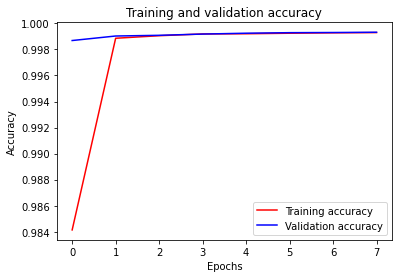

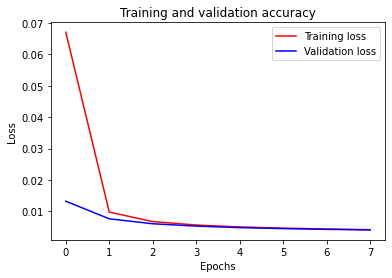

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [10]:

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc=0)
plt.figure()
plt.plot(epochs, loss , 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc=0)
plt.figure()

plt.figure()

In [11]:
def Evaluation(x,y):
    his=model.evaluate(test_x, test_y, batch_size=16, verbose=1)
    print('Model Loss is {} and prediction Accuracy is {}'.format(his[0],his[1]))

In [12]:
Evaluation(test_x,test_y)

2671/2671 [==============================] - 2s 917us/step - loss: 0.0048 - acc: 0.9992
Model Loss is 0.004788584541529417 and prediction Accuracy is 0.999204158782959
